In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [2]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [3]:
# Specify data URI
URI = '../data/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

2022-07-31 04:40:28.524316: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-31 04:40:28.524430: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-31 04:40:28.524475: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c1ad075bfae4): /proc/driver/nvidia/version does not exist
2022-07-31 04:40:28.525119: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


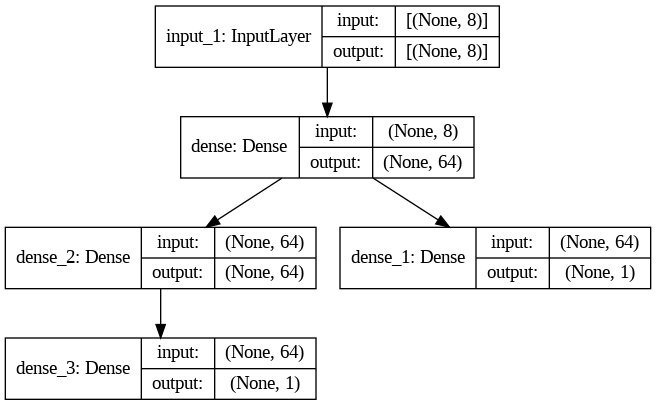

In [4]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

inputs = Input(shape = (norm_train_X.shape[1], ))
x = Dense(64, activation = 'relu')(inputs)
y1 = Dense(1)(x)
x1 = Dense(64)(x)
y2 = Dense(1)(x1)

model = Model(inputs, (y1, y2))

plot_model(model, show_shapes = True)

In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error

In [6]:
model.compile(
    optimizer = Adam(learning_rate = 0.01), 
    loss = mean_squared_error, metrics = ['mse']
)

In [7]:
history = model.fit(norm_train_X, train_Y, epochs = 10, validation_data = (norm_test_X, test_Y))

2022-07-31 04:40:33.761187: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
20/20 [==============================] - 1s 12ms/step - loss: 751.1677 - dense_1_loss: 487.1685 - dense_3_loss: 263.9991 - dense_1_mse: 487.1685 - dense_3_mse: 263.9991 - val_loss: 403.4413 - val_dense_1_loss: 371.3658 - val_dense_3_loss: 32.0755 - val_dense_1_mse: 371.3658 - val_dense_3_mse: 32.0755
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 298.7982 - dense_1_loss: 254.5857 - dense_3_loss: 44.2124 - dense_1_mse: 254.5857 - dense_3_mse: 44.2124 - val_loss: 144.7872 - val_dense_1_loss: 108.8329 - val_dense_3_loss: 35.9542 - val_dense_1_mse: 108.8329 - val_dense_3_mse: 35.9542
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 84.4613 - dense_1_loss: 58.4418 - dense_3_loss: 26.0195 - dense_1_mse: 58.4418 - dense_3_mse: 26.0195 - val_loss: 50.3294 - val_dense_1_loss: 31.4087 - val_dense_3_loss: 18.9207 - val_dense_1_mse: 31.4087 - val_dense_3_mse: 18.9207
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 4

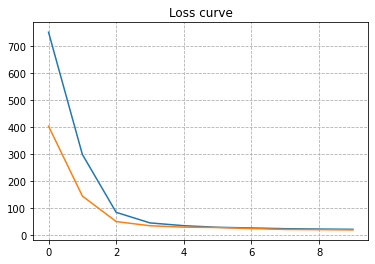

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss curve")
plt.grid(linestyle='--')

In [9]:
y1, y2 = model.predict(norm_test_X)

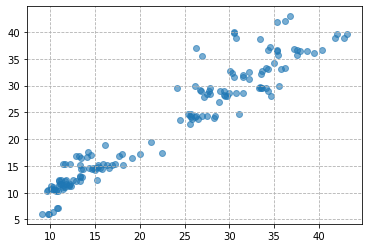

In [10]:
plt.scatter(y1, test_Y[0], alpha = 0.6)
plt.grid(linestyle = '--')

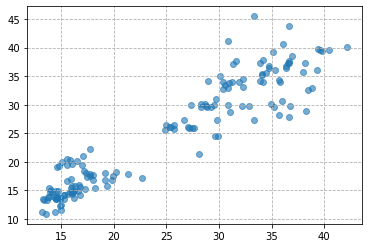

In [11]:
plt.scatter(y2, test_Y[1], alpha = 0.6)
plt.grid(linestyle = '--')

In [12]:
from prophet import Prophet